# Ex - GroupBy

### Introduction:

GroupBy can be summarized as Split-Apply-Combine.

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

Check out this [Diagram](http://i.imgur.com/yjNkiwL.png)  
### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv). 

### Step 3. Assign it to a variable called drinks.

In [2]:
url='https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'

In [3]:
df_drinks=pd.read_csv(url)

In [5]:
df_drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


### Step 4. Which continent drinks more beer on average?

In [13]:
df_beer=df_drinks.sort_values(by='beer_servings', ascending=False)

In [16]:
df_beer.reset_index().query('country == "Spain"')

,index,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
12,160,Spain,284,157,112,10.0,EU


In [17]:
df_drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [58]:
df_g=df_drinks.groupby('continent')

In [24]:
df_eu=df_g.get_group('EU')

In [32]:
df_af=df_g.get_group('AF')

In [36]:
df_sa=df_g.get_group('SA')

In [39]:
df_as=df_g.get_group('AS')

In [23]:
import matplotlib.pyplot as plt

Text(50, 50, 'Beer')

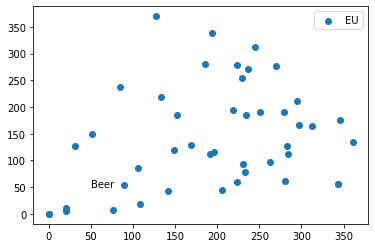

In [31]:
plt.scatter(x=df_eu.beer_servings, y=df_eu.wine_servings, label='EU')
plt.legend()
plt.text(x=50, y =50, s='Beer')

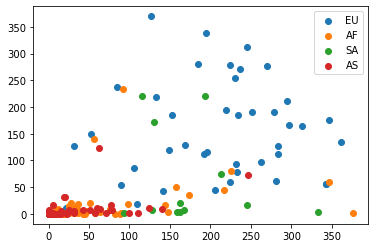

In [40]:
plt.scatter(x=df_eu.beer_servings, y=df_eu.wine_servings, label='EU')
plt.scatter(x=df_af.beer_servings, y=df_af.wine_servings, label='AF')
plt.scatter(x=df_sa.beer_servings, y=df_sa.wine_servings, label='SA')
plt.scatter(x=df_as.beer_servings, y=df_as.wine_servings, label='AS')
plt.legend()


In [59]:
df_drinks.fillna('NA', inplace=True)
continentes=df_drinks.continent.unique()
continentes

array(['AS', 'EU', 'AF', 'NA', 'SA', 'OC'], dtype=object)

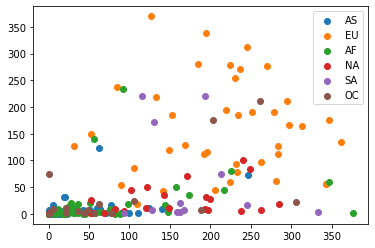

In [60]:
for cont in continentes:
    rakso=df_g.get_group(cont)
    plt.scatter(x=rakso.beer_servings, y=rakso.wine_servings, label=cont)
plt.legend()

In [63]:
df_drinks.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

1-Partimos del dataframe


--Dataframe con la media de los continentes
    EU 118
    AF 12
n-String "EU"

### Step 5. For each continent print the statistics for wine consumption.

In [80]:
for cont in continentes:
    print( cont)
    print(df_g.get_group(cont).describe()[['wine_servings']])
##df_drinks[['wine_servings']]

AS
       wine_servings
count      44.000000
mean        9.068182
std        21.667034
min         0.000000
25%         0.000000
50%         1.000000
75%         8.000000
max       123.000000
EU
       wine_servings
count      45.000000
mean      142.222222
std        97.421738
min         0.000000
25%        59.000000
50%       128.000000
75%       195.000000
max       370.000000
AF
       wine_servings
count      53.000000
mean       16.264151
std        38.846419
min         0.000000
25%         1.000000
50%         2.000000
75%        13.000000
max       233.000000
NA
       wine_servings
count      23.000000
mean       24.521739
std        28.266378
min         1.000000
25%         5.000000
50%        11.000000
75%        34.000000
max       100.000000
SA
       wine_servings
count      12.000000
mean       62.416667
std        88.620189
min         1.000000
25%         3.000000
50%        12.000000
75%        98.500000
max       221.000000
OC
       wine_servings
count       16.0

### Step 6. Print the mean alcohol consumption per continent for every column

In [84]:
df_drinks.groupby('continent').mean()[]

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


### Step 7. Print the median alcohol consumption per continent for every column

In [85]:
df_drinks.groupby('continent').median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
NA,143.0,137.0,11.0,6.30
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


### Step 8. Print the mean, min and max values for spirit consumption.
#### This time output a DataFrame

In [101]:
df_drinks.groupby('continent').spirit_servings.agg(['mean','max','min'])

,mean,max,min
continent,,,
AF,16.339623,152,0
AS,60.840909,326,0
EU,132.555556,373,0
NA,165.739130,438,68
OC,58.437500,254,0
SA,114.750000,302,25
